<a href="https://colab.research.google.com/github/harunpehlivan/-harunpehlivan/blob/master/25Jan_Identify_KPIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Machine Learning Framework: KDD / SEMMA (1996)
# SEMMA: Sample, Explore, Modify, Model, Assess
# Objective: Acquire knowledge out of house dataset provided
# Purpose: House price prediction
# Datapoint: http://hackveda.in/sistec/Housing_Modified.csv
# Source: Boston City

# 1. Sample 
import pandas as pd
data = pd.read_csv("http://hackveda.in/sistec/Housing_Modified.csv")
data.head(5)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')


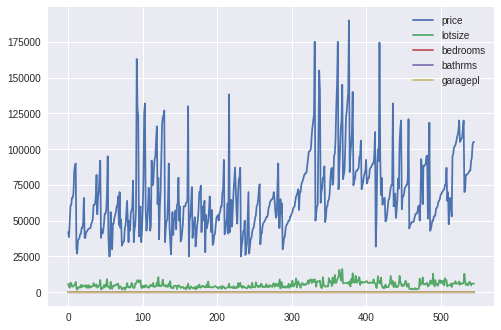

In [0]:
# 2. Explore
# Plot the variables / attributes in data
print(data.columns)
data.plot()

In [0]:
# Explore
# Check the correlation of all attributes / variables in sample
data.corr()

# Check the shape of dataset
data.shape

(546, 12)

In [0]:
# 3. Modify 
# Convert string to numeric 
# 3a. Convert binary category to numeric using Label Binarizer
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()
data.driveway = lb.fit_transform(data.driveway)
data.recroom = lb.fit_transform(data.recroom)
data.fullbase = lb.fit_transform(data.fullbase)
data.gashw = lb.fit_transform(data.gashw)
data.airco = lb.fit_transform(data.airco)
data.prefarea = lb.fit_transform(data.prefarea)
data.head(2)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0


In [0]:
# Modify
# 3b. Convert n-categorical string attributes / variables into numeric
# Technique: One-Hot Encoding using Dummy Indicator Variables
data_stories = pd.get_dummies(data.stories, prefix="stories")

# Shape of data before concatenation
data.shape

(546, 12)

In [0]:
# Concatenate data with data_stories and remoove stories string category column
data = pd.concat([data, data_stories], axis=1)

In [0]:
# Remove the string category stories
del data["stories"]

# Check the shape of data after modification
data.shape

(546, 15)

In [0]:
# Show the columns
print(data.columns)

# Show the top 3 observations from data
data.head(3)

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_four',
       'stories_one', 'stories_three', 'stories_two'],
      dtype='object')


,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,0,1,0,0


In [0]:
# 4. Model - Data Mining 
# Check the Key Performing Indicators 

# 4a. Show the correlation matrix to check all key performing indicators
data.corr()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
price,1.000000,0.535796,0.366447,0.516719,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074,0.372281,-0.270058,0.138254,-0.002089
lotsize,0.535796,1.000000,0.151851,0.193833,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782,0.178354,0.054348,0.020567,-0.159612
bedrooms,0.366447,0.151851,1.000000,0.373769,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953,0.145525,-0.509974,0.099150,0.377424
bathrms,0.516719,0.193833,0.373769,1.000000,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013,0.281003,-0.250784,0.036027,0.080982
driveway,0.297167,0.288778,-0.011996,0.041955,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378,0.115453,-0.053249,0.073533,-0.047074
recroom,0.254960,0.140327,0.080492,0.126892,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292,0.067567,-0.022632,-0.038733,0.006938
fullbase,0.186218,0.047487,0.097201,0.102791,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651,-0.165285,0.059154,-0.132540,0.098694
gashw,0.092837,-0.009201,0.046028,0.067365,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170,-0.062416,-0.060336,0.072922,0.054823
airco,0.453347,0.221765,0.160412,0.184955,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626,0.298887,-0.143174,0.110682,-0.074706
garagepl,0.383302,0.352872,0.139117,0.178178,0.203682,0.038122,0.052524,0.068144,0.156596,1.000000,0.092364,0.126112,0.016610,-0.079170,-0.041931


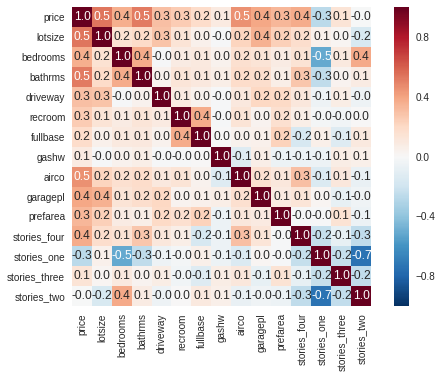

In [0]:
# 4. Modify 
# Create a correlation matrix or a heatmap visual correlation computation
import seaborn as sns
sns.heatmap(data.corr(), annot=True, square=True, fmt='.1f')

In [0]:
# 4. Model
import statsmodels.api as sm

response = data["price"] # dependent variable ( Y )
independent = data.columns
independent = independent.delete(0) # Delete price column from independent

print("Response variable", response)
print("Independent variable", independent)

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Response variable 0       42000.0
1       38500.0
2       49500.0
3       60500.0
4       61000.0
5       66000.0
6       66000.0
7       69000.0
8       83800.0
9       88500.0
10      90000.0
11      30500.0
12      27000.0
13      36000.0
14      37000.0
15      37900.0
16      40500.0
17      40750.0
18      45000.0
19      45000.0
20      48500.0
21      65900.0
22      37900.0
23      38000.0
24      42000.0
25      42300.0
26      43500.0
27      44000.0
28      44500.0
29      44900.0
         ...   
516     95000.0
517     96500.0
518    101000.0
519    102000.0
520    103000.0
521    105000.0
522    108000.0
523    110000.0
524    113000.0
525    120000.0
526    105000.0
527    106000.0
528    107500.0
529    108000.0
530    113750.0
531    120000.0
532     70000.0
533     71000.0
534     82000.0
535     82000.0
536     82500.0
537     83000.0
538     84000.0
539     85000.0
540     85000.0
541     91500.0
542     94000.0
543    103000.0
544    105000.0
545    105000.0
Name: 

In [0]:
Y = data["price"]
X = data[independent]
ols_model = sm.OLS(Y, X).fit() # calculate m and c using actual values of Y & X

In [0]:
predicted_price = ols_model.predict(X)

# equation: Y = m1X1 + m2X2 + .... mnXn + c

# fit stage:
# calculation of m1, m2, m3 .... mn and c is done in this stage using actual Y(price), X(independent)

# predict stage
# Y1 = mX1 + c [ Y1 = predicted_price ]


# 5. Assess
# Compared actual price vs predicted price to check accuracy using R-squared
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     84.47
Date:                Tue, 29 Jan 2019   Prob (F-statistic):          4.12e-120
Time:                        13:17:01   Log-Likelihood:                -6033.7
No. Observations:                 546   AIC:                         1.210e+04
Df Residuals:                     532   BIC:                         1.216e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.4853      0.357      9.760      0.000       2.784       4.187
bedrooms       2207.4007   1126.826      1.959      0.051      -6.174    4420.976
bathrms        1.423e+04   1501.004      9.479      0.000    1.13e+04    1.72e+04
driveway       6744.5906   2049.077      3.292      0.001    2719.317    1.08e+04
recroom        4452.7280   1905.476      2.337      0.020     709.547    8195.909
fullbase       5611.2079   1602.026      3.503      0.000    2464.134    8758.281
gashw          1.298e+04   3244.074      4.002      0.000    6610.754    1.94e+04
airco          1.246e+04   1568.474      7.944      0.000    9379.277    1.55e+04
garagepl       4207.8472    847.752      4.964      0.000    2542.495    5873.200
prefarea       9339.4245   1695.216      5.509      0.000    6009.286    1.27e+04
stories_four   2.265e+04   5140.674      4.406      0.000    1.25e+04    3.27e+04
stories_one    2381.0771   3517.544      0.677      0.499   -4528.903    9291.057
stories_three  1.512e+04   4848.135      3.119      0.002    5596.507    2.46e+04
stories_two    7666.2541   4153.290      1.846      0.065    -492.606    1.58e+04
==============================================================================
Omnibus:                       98.599   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.624
Skew:                           0.891   Prob(JB):                     1.27e-58
Kurtosis:                       5.923   Cond. No.                     7.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
# Implementation of variance inflation factor for multicollinearity removal
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
type(X)

# Convert dataframe to ndarray
x_array = X.values
type(x_array)

# Implementation of multi-collinearity removal
for i in range(len(independent)):
    mvif = [vif(X[independent].values, index) 
            for index in range(len(independent))]
    print("VIF Values:", mvif)
    max_vif = max(mvif)
    dindex = mvif.index(max_vif)
    print("Index", dindex, "MaxVIF",
          max_vif, "Column", independent[dindex])
    if max_vif > 10:
        independent = independent.delete(dindex)
print(independent)
    
  

VIF Values: [8.094996102279291, 5.9918931873078485, 6.157107083439655, 1.4717052729505369, 2.026343384794928, 1.102590436249824, 1.7820359988467247, 1.9580853431255436, 1.5269631938424795, 1.4369024266423396, 1.8614382750496408, 1.2759386981540837]
Index 0 MaxVIF 8.094996102279291 Column lotsize
VIF Values: [8.094996102279291, 5.9918931873078485, 6.157107083439655, 1.4717052729505369, 2.026343384794928, 1.102590436249824, 1.7820359988467247, 1.9580853431255436, 1.5269631938424795, 1.4369024266423396, 1.8614382750496408, 1.2759386981540837]
Index 0 MaxVIF 8.094996102279291 Column lotsize
VIF Values: [8.094996102279291, 5.9918931873078485, 6.157107083439655, 1.4717052729505369, 2.026343384794928, 1.102590436249824, 1.7820359988467247, 1.9580853431255436, 1.5269631938424795, 1.4369024266423396, 1.8614382750496408, 1.2759386981540837]
Index 0 MaxVIF 8.094996102279291 Column lotsize
VIF Values: [8.094996102279291, 5.9918931873078485, 6.157107083439655, 1.4717052729505369, 2.026343384794928,

In [0]:
Y = data["price"]
X_new = data[independent]
ols_model_1 = sm.OLS(Y, X_new).fit()
ols_model_1.summary()

predict_price_1 = ols_model_1.predict(X_new)

# Make a dataframe with three columns
# actual price, predicted_price(65) and predict_price_1(95)
sample_df = pd.DataFrame()
sample_df["Actual"] = data["price"]
sample_df["Predict_65"] = ols_model.predict(X)
sample_df["Predict_95"] = ols_model_1.predict(X_new)
sample_df

,Actual,Predict_65,Predict_95
0,42000.0,65469.387145,64657.294572
1,38500.0,41709.888312,42209.454213
2,49500.0,40641.075980,38344.632373
3,60500.0,62891.326583,61478.771104
4,61000.0,49935.274323,51912.623939
5,66000.0,66999.317077,65985.216340
6,66000.0,77039.215041,79520.146163
7,69000.0,57214.209004,55764.169629
8,83800.0,56769.491374,55868.516188
9,88500.0,104761.319324,105709.329048


Text(0.5, 1.0, 'House price model comparison')

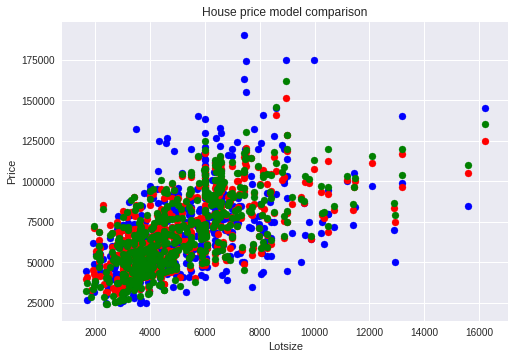

In [0]:
# Plot the graph with Actual, Predicted_65 and Predicted_95
import matplotlib.pyplot as plt
plt.scatter(X.lotsize, sample_df["Actual"], color="blue")
plt.scatter(X.lotsize, sample_df["Predict_65"], color="red")
plt.scatter(X.lotsize, sample_df["Predict_95"], color="green")

plt.xlabel("Lotsize")
plt.ylabel("Price")
plt.title("House price model comparison")


In [0]:
independent

Index(['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw',
       'airco', 'garagepl', 'prefarea', 'stories_four', 'stories_one',
       'stories_three'],
      dtype='object')

In [0]:
# 29 January 2019 Session Live
# Objectives:
# 1. Create a simple cli app to ask info from users
# and predict the house price

# How to take user input 
lotsize = input("Enter lotsize: ")
print("The lotsize of house is", lotsize)

bathrms = int(input("Enter bathrooms:"))
print("Number of bathrooms in house", bathrms)

# Check the type of input
print("The type of lotsize is", type(lotsize))
print("The type of bathrms is", type(bathrms))

# Convert input string into numbers using int()


Enter lotsize: 5850
The lotsize of house is 5850
Enter bathrooms:3
Number of bathrooms in house 3
The type of lotsize is <class 'str'>
The type of bathrms is <class 'int'>


In [0]:
# Ask users about the information for independent variables
independent
ols_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     930.4
Date:                Tue, 29 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:45:25   Log-Likelihood:                -6047.4
No. Observations:                 546   AIC:                         1.212e+04
Df Residuals:                     534   BIC:                         1.217e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           4.1115      0.344     11.937      0.000       3.435       4.788
bathrms        1.915e+04   1199.638     15.960      0.000    1.68e+04    2.15e+04
driveway       1.113e+04   1810.868      6.147      0.000    7574.382    1.47e+04
recroom        3859.1179   1946.746      1.982      0.048      34.898    7683.338
fullbase       6510.7340   1627.888      3.999      0.000    3312.883    9708.585
gashw          1.346e+04   3319.112      4.055      0.000    6940.153       2e+04
airco          1.275e+04   1604.058      7.947      0.000    9597.031    1.59e+04
garagepl       3816.1175    856.966      4.453      0.000    2132.680    5499.555
prefarea       8610.2816   1726.212      4.988      0.000    5219.283     1.2e+04
stories_four   1.325e+04   2958.738      4.478      0.000    7436.004    1.91e+04
stories_one   -4514.6906   1431.186     -3.155      0.002   -7326.137   -1703.245
stories_three  8382.1828   2822.732      2.970      0.003    2837.161    1.39e+04
==============================================================================
Omnibus:                       69.266   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.919
Skew:                           0.683   Prob(JB):                     1.88e-35
Kurtosis:                       5.273   Cond. No.                     2.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
# Ask for independent variables from user

# create an empty dictionary
dict1 = {} 

# for each column in independent variables
for column in independent: 
  temp = int(input("Enter "+column+":")) #Read column as int and store to temp
  dict1[column] = temp # Add temp value under column key in dict1
dict1 # Show the contents of dictionary dict1



Enter lotsize:3000
Enter bathrms:2
Enter driveway:1
Enter recroom:0
Enter fullbase:1
Enter gashw:0
Enter airco:0
Enter garagepl:1
Enter prefarea:0
Enter stories_four:0
Enter stories_one:0
Enter stories_three:1


{'airco': 0,
 'bathrms': 2,
 'driveway': 1,
 'fullbase': 1,
 'garagepl': 1,
 'gashw': 0,
 'lotsize': 3000,
 'prefarea': 0,
 'recroom': 0,
 'stories_four': 0,
 'stories_one': 0,
 'stories_three': 1}

In [0]:
# Create a dataframe using dictionary and add values to index zero

user_data = pd.DataFrame(data=dict1, index=[0], columns=independent)
user_data

,lotsize,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three
0,3000,2,1,0,1,0,0,1,0,0,0,1


In [0]:
# Predict price of house for current user_data
price = ols_model_1.predict(user_data)
print("Predicted house price is: USD", round(price[0]))
print("Predicted house price is: USD", int(price[0]))

Predicted house price is: USD 80468.0
Predicted house price is: USD 80468


In [0]:
# Ask for independent variables from user

# create an empty dictionary
dict1 = {} 

# for each column in independent variables
for column in independent: 
  temp = int(input("Enter "+column+":")) #Read column as int and store to temp
  dict1[column] = temp # Add temp value under column key in dict1
user_data = pd.DataFrame(data=dict1, index=[0], columns=independent)
# Predict price of house for current user_data
price = ols_model_1.predict(user_data)
print("Predicted house price is: USD", round(price[0]))
print("Predicted house price is: USD", int(price[0]))

Enter lotsize:3000
Enter bathrms:1
Enter driveway:1
Enter recroom:0
Enter fullbase:0
Enter gashw:0
Enter airco:0
Enter garagepl:0
Enter prefarea:0
Enter stories_four:0
Enter stories_one:0
Enter stories_three:0
Predicted house price is: USD 42613.0
Predicted house price is: USD 42612
